In [ ]:
#@markdown What sentiment would you assign Sentence A?
A  = "" #@param ["positive", "negative", "neutral", ""]

#@markdown What sentiment would you assign Sentence B?
B = '' #@param ["positive", "negative", "neutral", ""]


if A == "negative":
  print("Yes, since the company did not profit you can interpret this as being negative! You could also interpret it as neutral.")
elif A == "neutral":
  print("Yes, since the company did not profit you can interpret this as being neutral! You could also interpret it as negative.")
else:
  print('Not quite the right sentiment!')
if B == "positive":
  print("Yes, since the company made significant profits you can interpret that as being positive!")
else:
  print('Not quite the right sentiment!')


Not quite the right sentiment!
Not quite the right sentiment!


In [ ]:
#@title Exercise. Brainstorm some ways you can capture word order in your model?
Method_1 = 'look at the sentences' #@param {type:"string"}
Method_2 = 'club the whole thing together' #@param {type:"string"}

In [ ]:
#@title Load the datasets and setup the environment. { display-mode: "form" }
# Run this every time you open the spreadsheet
%load_ext autoreload
%autoreload 2
from collections import Counter
from importlib.machinery import SourceFileLoader
import numpy as np
from os.path import join
import warnings
warnings.filterwarnings("ignore")
from torchtext.vocab import GloVe
import nltk
nltk.download('punkt')
import seaborn as sns
import matplotlib

from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.corpus import stopwords
nltk.download('stopwords' ,quiet=True)
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd
from sklearn.metrics import multilabel_confusion_matrix
from sklearn import metrics
import gdown
import string
import numpy
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
!pip install Keras-Preprocessing
from keras.preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping
from keras.layers import Dropout
import re
from nltk.corpus import stopwords
from nltk import word_tokenize
STOPWORDS = set(stopwords.words('english'))
from bs4 import BeautifulSoup

from keras.preprocessing.text import Tokenizer
import string

from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true,y_predicted):
  cm = metrics.confusion_matrix(y_true, y_predicted)
  print ("Plotting the Confusion Matrix")
  labels = ["Negative","Neutral","Positive"]
  df_cm = pd.DataFrame(cm,index =labels,columns = labels)
  fig = plt.figure(figsize=(7,6))
  res = sns.heatmap(df_cm, annot=True,cmap='Blues', fmt='g')
  plt.yticks([0.5,1.5,2.5], labels,va='center')
  plt.title('Confusion Matrix - TestData')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()
  plt.close()


def get_finance_train():
  df_train = pd.read_csv("finance_train.csv")
  return df_train
def get_finance_test():
  df_test = pd.read_csv("finance_test.csv")
  return df_test

PUNCTUATION = '!#$%&()*,-./:;<=>?@^_`{|}~'

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing.
    # text = text.replace('x', '')
#    text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwords from text
    return text

def pad_sequences_train(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_train['Sentence'].values)
  X_train = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_train

def pad_sequences_test(df_train, df_test):
  tokenizer = Tokenizer(num_words=MAX_NB_WORDS, filters='!"#$%&()*+,-./:;<=>?@[\]^_`{|}~', lower=True)
  tokenizer.fit_on_texts(df_train['Sentence'].values)
  word_index = tokenizer.word_index
  X = tokenizer.texts_to_sequences(df_test['Sentence'].values)
  X_test = pad_sequences(X, maxlen=MAX_SEQUENCE_LENGTH)
  return X_test

def run_model(X_train, y_train, X_test, y_test, epochs=5, max_sequence_length=256, max_nb_words=1000, embedding_dim=300):
  if any(x is None for x in [X_train, y_train, X_test, y_test, epochs, max_sequence_length, max_nb_words, embedding_dim]):
    print('Replace the None values above with your new values before calling the run_model() function.')
    return None, None, None
  model = Sequential()
  model.add(Embedding(max_nb_words+1, embedding_dim, mask_zero=True, input_length=max_sequence_length))
  model.add(SpatialDropout1D(0.2))
  model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
  model.add(Dense(n_labels, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
  print(model.summary())
  history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])
  test_loss, test_accuracy = model.evaluate(X_test, y_test)
  return model, history, test_accuracy


EMBEDDING_DIM = 300

plt.rcParams.update({'font.size': 22})

nltk.download('wordnet')

!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_test.csv'
!wget -q --show-progress 'https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Scholars/Sessions%206%20-%2010%20(Projects)/Project%20-%20NLP%2BFinance/finance_train.csv'

print ("Train & Test Files are loaded")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


finance_test.csv.1  100%[===================>]  28.58K  --.-KB/s    in 0s      
finance_train.csv.1 100%[===================>] 252.53K   817KB/s    in 0.3s    
Train & Test Files are loaded


In [ ]:
df_train = get_finance_train()
df_test = get_finance_test()

Run the 2 cells below to display both datasets and their length:

In [ ]:
print(len(df_train))
df_train.head()

2037


,Sentence,Label
0,Autotank Group is part of Aspo 's Systems Divi...,1
1,"The contract includes design , construction , ...",1
2,Rapala said it estimates it will make savings ...,2
3,The share capital of Alma Media Corporation (b...,1
4,The financial impact is estimated to be some 1...,2


In [ ]:
print(len(df_test))
df_test.head()

227


,Sentence,Label
0,"In the third quarter of 2010 , net sales incre...",2
1,Foundries division reports its sales increased...,2
2,Financing of the project will come mainly from...,1
3,"Sukhraj Dulai , of the 2900 block of Boni Sue ...",1
4,Finland 's leading metals group Outokumpu said...,2


In [ ]:
longest_sentence_index = np.argmax([len(x) for x in df_train['Sentence'].str.split(' ')])
longest_sentence = df_train.iloc[longest_sentence_index]['Sentence']
longest_sentence_length = len(longest_sentence.split(' '))
print('The longest sentence has length {} and is: \n\n{}'.format(longest_sentence_length, longest_sentence))

The longest sentence has length 81 and is: 

Supported Nokia phones include : N96 , N95-8GB , N95 , N93-N931 , N92 , N85 , N82 , N81 , N80 , N79 , N78 , N77 , N76 , N75 , N73 , N72 , N71 , E90 , E71 , E70 , E66 , E65 , E62 , E61-E61i , E60 , E51 , E50 , Touch Xpress 5800 , 6220 Classic , 6210 Navigator , 6120 Classic , 6110 Navigator , 5700 , 5500 , 5320XM .


In [ ]:
df_train['Sentence'] = df_train['Sentence'].apply(clean_text)
df_test['Sentence'] = df_test['Sentence'].apply(clean_text)

In [ ]:
MAX_SEQUENCE_LENGTH = 256

In [ ]:
MAX_NB_WORDS = 1000

In [ ]:
X_train = pad_sequences_train(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_train.shape))
print(X_train[0])

The shape of the dataframe is (2037, 256)
[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0 

In [ ]:
X_test = pad_sequences_test(df_train, df_test)
print('The shape of the dataframe is {}'.format(X_test.shape))

The shape of the dataframe is (227, 256)


In [ ]:
y_train = pd.get_dummies(df_train['Label']).values
print(y_train.shape)

(2037, 3)


In [ ]:
y_test = pd.get_dummies(df_test['Label']).values
print(y_test.shape)

(227, 3)


In [ ]:
n_labels = 3
label_map = {0 : "negative",
             1 : "neutral",
             2 : "positive"}

In [ ]:
#@title Instantiate model
model = Sequential()
model.add(Embedding(MAX_NB_WORDS+1, EMBEDDING_DIM, mask_zero=True, input_length=MAX_SEQUENCE_LENGTH))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(n_labels, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 256, 300)          300300    
                                                                 
 spatial_dropout1d_3 (Spatia  (None, 256, 300)         0         
 lDropout1D)                                                     
                                                                 
 lstm_3 (LSTM)               (None, 100)               160400    
                                                                 
 dense_3 (Dense)             (None, 3)                 303       
                                                                 
Total params: 461,003
Trainable params: 461,003
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
epochs = 5
batch_size = 64

In [ ]:
history = model.fit(X_train,
                    y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    validation_split=0.1,
                    callbacks=[EarlyStopping(monitor='val_loss', patience=3, min_delta=0.0001)])

Epoch 1/5
29/29 [==============================] - 77s 2s/step - loss: 0.9318 - accuracy: 0.6759 - val_loss: 0.6858 - val_accuracy: 0.7941
Epoch 2/5
29/29 [==============================] - 50s 2s/step - loss: 0.5716 - accuracy: 0.7714 - val_loss: 0.5770 - val_accuracy: 0.7843
Epoch 3/5
29/29 [==============================] - 54s 2s/step - loss: 0.3815 - accuracy: 0.8658 - val_loss: 0.6260 - val_accuracy: 0.8480
Epoch 4/5
29/29 [==============================] - 66s 2s/step - loss: 0.2404 - accuracy: 0.9214 - val_loss: 0.5554 - val_accuracy: 0.8284
Epoch 5/5
29/29 [==============================] - 61s 2s/step - loss: 0.1732 - accuracy: 0.9400 - val_loss: 0.5159 - val_accuracy: 0.8382


In [ ]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print('Test set loss is {:} and accuracy is {:.2%}'.format(test_loss, test_accuracy))

8/8 [==============================] - 1s 114ms/step - loss: 0.4837 - accuracy: 0.8370
Test set loss is 0.48374173045158386 and accuracy is 83.70%


In [ ]:
training_loss = history.history['loss']

Do the same for your validation loss through calling `history.history["val_loss"]` and save it in a variable named `validation_loss`.

In [ ]:
validation_loss = history.history['val_loss']

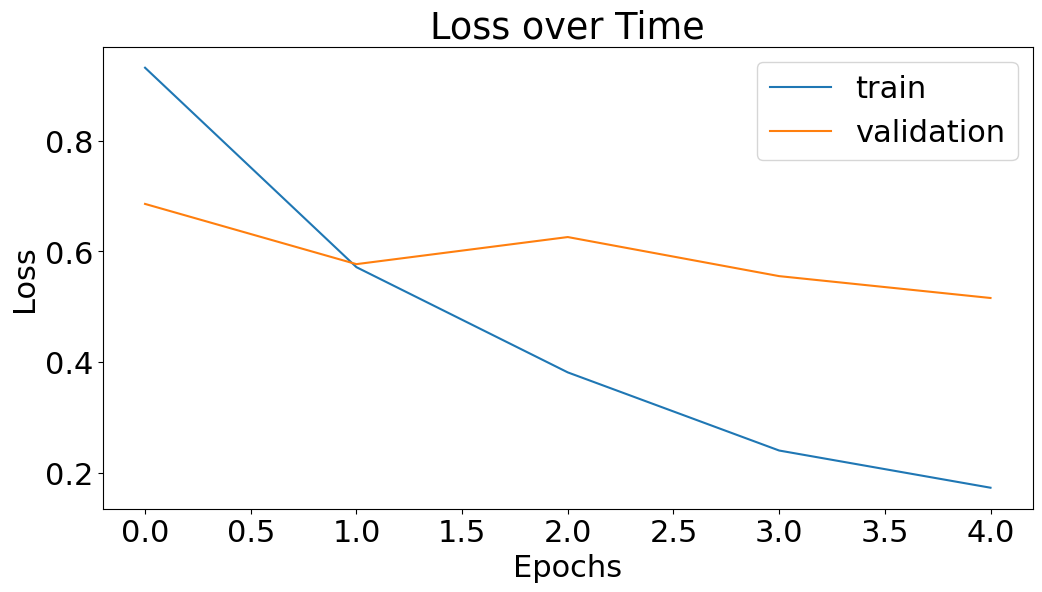

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Loss over Time')
plt.xlabel('Epochs')
plt.ylabel('Loss')

plt.plot(training_loss, label='train')
plt.plot(validation_loss, label='validation')

plt.legend()
plt.show()

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

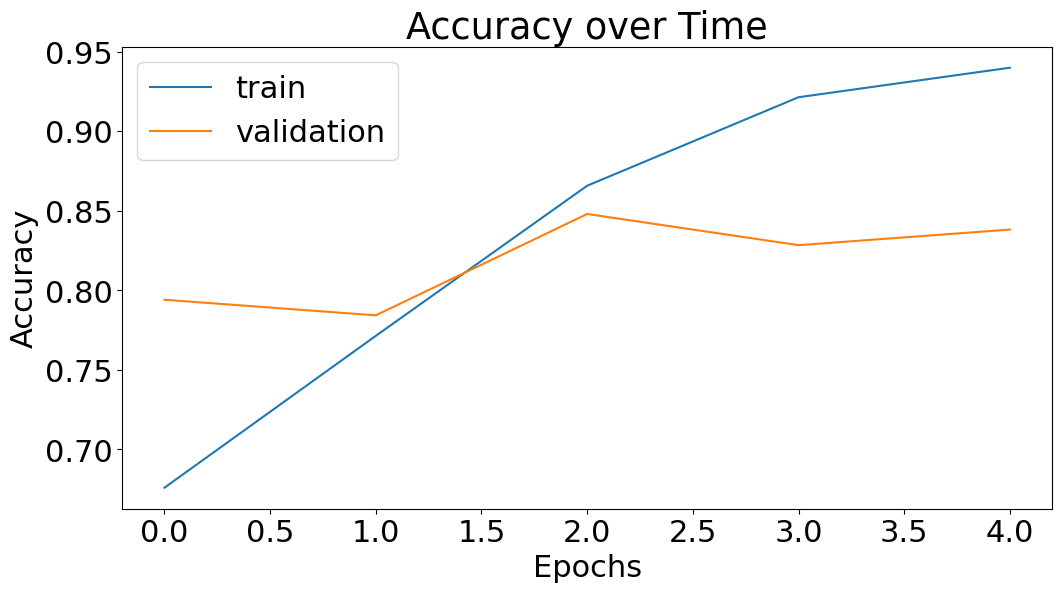

In [ ]:
fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

In [ ]:
model, history, test_acc = run_model(
    X_train=X_train,
    y_train=y_train,
    X_test=X_test,
    y_test=y_test,
    epochs=6,
    max_nb_words=1500,
    embedding_dim=280
)
print('New test accuracy is {}'.format(test_acc))

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 256, 280)          420280    
                                                                 
 spatial_dropout1d_2 (Spatia  (None, 256, 280)         0         
 lDropout1D)                                                     
                                                                 
 lstm_2 (LSTM)               (None, 100)               152400    
                                                                 
 dense_2 (Dense)             (None, 3)                 303       
                                                                 
Total params: 572,983
Trainable params: 572,983
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/6
29/29 [==============================] - 52s 2s/step - loss: 0.9033 - accuracy: 0.6776 - val_loss: 

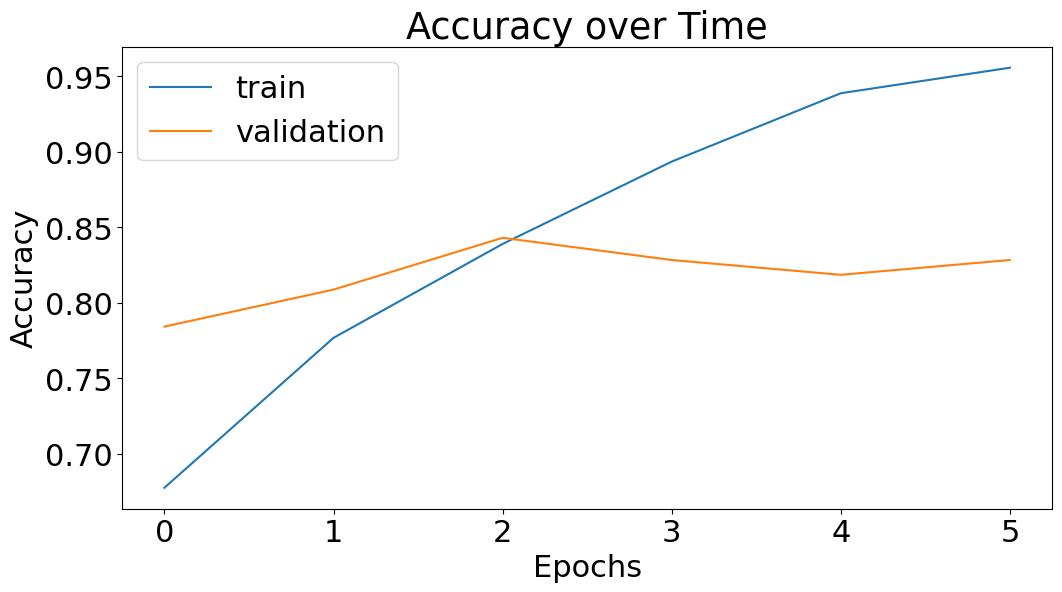

In [ ]:
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

fig = plt.figure(figsize=(12,6))
plt.title('Accuracy over Time')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.plot(training_accuracy, label='train')
plt.plot(validation_accuracy, label='validation')

plt.legend()
plt.show()

8/8 [==============================] - 1s 114ms/step
Plotting the Confusion Matrix


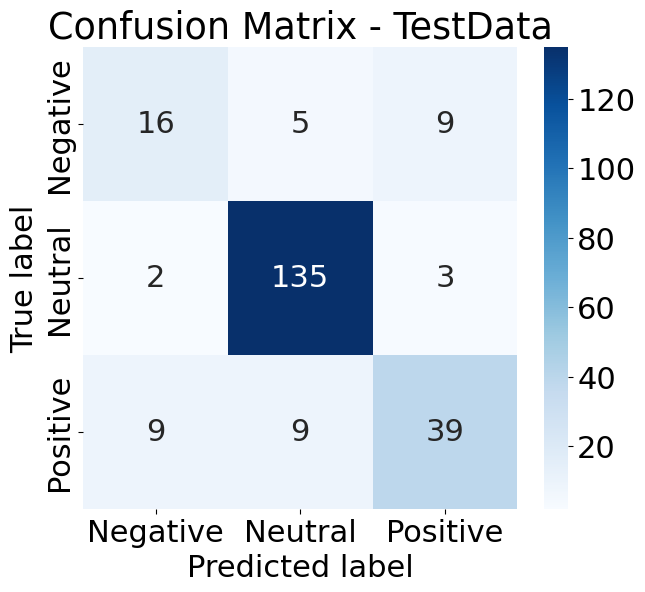

In [ ]:
# Predict on test set
y_prob = model.predict(X_test)
y_pred = y_prob.argmax(axis = - 1)
y_true = y_test.argmax(axis = - 1)

plot_confusion_matrix(y_true, y_pred)